In [37]:
import bc_gh
import mod
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [38]:
SNR1_dB = 5
SNR2_dB = 15

SNR1 = 10**(.1*SNR1_dB)
SNR2 = 10**(.1*SNR2_dB)

M1 = 4
M2 = 64

K1 = int(np.log2(M1))
K2 = int(np.log2(M2))

symbols1, labels1 = mod.grayQAM(M1, dec_label=True)
symbols2, labels2 = mod.grayQAM(M2, dec_label=True)

alpha_vec = np.arange(0, 1.0, 0.023923631784950855)
R1_type1 = np.zeros(len(alpha_vec))
R2_type1 = np.zeros(len(alpha_vec))
R1_type2 = np.zeros(len(alpha_vec))
R2_type2 = np.zeros(len(alpha_vec))

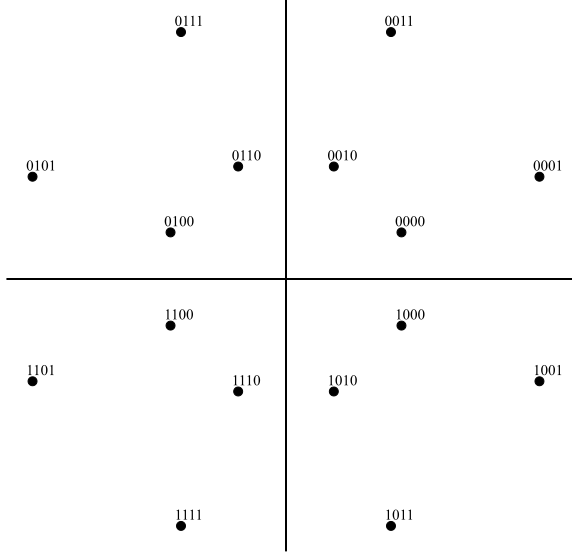

In [47]:
s, l = mod.grayAPSK(np.array([8]*2))
mod.showConsteDiagram(s, l)

In [39]:
# Type1
for i in tqdm(range(len(alpha_vec))):
    
    alpha = alpha_vec[i]
    symbols, labels = mod.MUST(symbols1, symbols2, labels1, labels2, 1-alpha, alpha, 1)

    tmp1 = bc_gh.awgn(symbols*np.sqrt(SNR1), labels, K1)
    R1_type1[i] = tmp1.sum()
    
    tmp2 = bc_gh.awgn(symbols*np.sqrt(SNR2), labels, -K2)
    R2_type1[i] = tmp2.sum()

100%|██████████| 42/42 [00:04<00:00,  8.59it/s]


In [40]:
# Type2
for i in tqdm(range(len(alpha_vec))):
    
    alpha = alpha_vec[i]
    symbols, labels = mod.MUST(symbols1, symbols2, labels1, labels2, 1-alpha, alpha, 2)

    tmp1 = bc_gh.awgn(symbols*np.sqrt(SNR1), labels, K1)
    R1_type2[i] = tmp1.sum()
    
    tmp2 = bc_gh.awgn(symbols*np.sqrt(SNR2), labels, -K2)
    R2_type2[i] = tmp2.sum()

100%|██████████| 42/42 [00:04<00:00,  8.76it/s]


In [41]:
M_APSK = [32]*8
symbols, labels1 = mod.grayAPSK(np.array(M_APSK))
tmp1 = bc_gh.awgn(symbols*np.sqrt(SNR1), labels, K1)
R1 = tmp1.sum()

tmp2 = bc_gh.awgn(symbols*np.sqrt(SNR2), labels, -K2)
R2 = tmp2.sum()

In [42]:
print(R1, R2)

0.7750453948974609 2.151297628879547


In [46]:
R1_type2[1]
R2_type2[1]

0.6781458854675293

Text(0, 0.5, '广播业务可达速率(bit/symbol)')

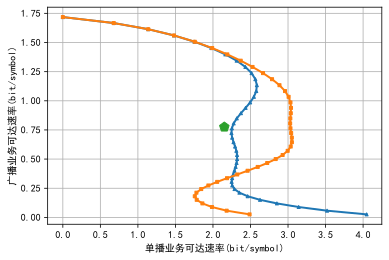

In [44]:
fig = plt.figure()
plt.grid()

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

plt.plot(R2_type1, R1_type1, linewidth=2.0, marker='^', markersize=3)
plt.plot(R2_type2, R1_type2, linewidth=2.0, marker='s', markersize=3)
plt.plot(R2, R1, marker='p', markersize=10)
plt.xlabel("单播业务可达速率(bit/symbol)")
plt.ylabel("广播业务可达速率(bit/symbol)")
# plt.xlim((0, 5.5))
# plt.ylim((0, 2.25))